# 第八章: Python基础入门
___

## 学习目标

1. 掌握基本的Python语法：常用数据结构、函数、流程控制

2. 迭代器(iterator)、生成器 (generator)

3. 面向对象编程 (Object-Oriented Programming)

4. 常用模块：str, os, sys、argparse、optparse、math、re等

5. 案例代码分析

## 1. 基本数据类型

### 1.1 数据类型
- 数据类型可用`type(data)`函数进行查看
- 数据在内存中的储存地址可用`id(data)`查看
- 数据可用的方法可用`dir(data)`进行查看

In [8]:
i = 5
print(type(i))
print(id(i))

<class 'int'>
94213344662400


In [ ]:
dir(i)    # 列出当前数据的可用方法

In [13]:
# 5=00000101(取反))->11111010(补码)->11111001->10000110(原码)-6
print(i.__invert__())

-6


In [ ]:
help(i.__gt__)

### 1.2 整数型（int）
- 整数型的数据一般比较简单
- 能用的方法也比较少
- `__gt__(other)`方法最后可通过`i > other`实现

In [17]:
i= 5
type(i)

int

In [18]:
print(i.denominator)

1


In [19]:
print(i.numerator)

5


In [20]:
print(i.__gt__(3))

True


### 1.3 布尔型（bool）
- 布尔型只有True和False两个值
- 下面的这些不同类型的值对应的都是`False`

In [25]:
print(bool(None), bool(0), bool(0.0), bool(""), bool([]), bool(()), bool({}))

False False False False False False False


- 布尔表达式返回的就是布尔值

In [26]:
print(5 >= 3)

True


### 1.4 浮点数（float）
- 浮点数一般指的就是小数值
- 浮点数对应的方法与整型差别不大，就增减了一些
- 

In [30]:
f = 2.15
type(f)

float

### 1.5 字符串类型（str）

In [29]:
type('c')

str

In [37]:
s = "ACCTAGGACGT"

In [38]:
print(s[0])

A


In [39]:
print(s[0:5:2])

ACA


In [41]:
s[3]='N'   # str is immutable object.

TypeError: 'str' object does not support item assignment

### 1.6 None类型（NoneType）
- None是python的一种特殊类型

In [31]:
type(None)

NoneType

In [36]:
a = list()
print(a is None)

False


### 1.7 Type类型
- type也是一种特殊的类型

In [42]:
type(str)

type

In [43]:
type(float)

type

## 2. 基本复合数据结构

### 2.1 列表List

- 列表是一种有序的、可修改的数据结构；
- 列表元素可用`<list>[from_inclusive : to_exclusive : ±step_size]`访问，其中`from_inclusive`和`to_exclusive`是整数索引，`step_size`则是整数步长；
- 列表可用`<list>.append(<el>)`或者`<list> += [<el>]`添加元素；
- 列表还可以扩展`<list>.extend(<collection>)`或者`<list> += <collection>`；
- 列表元素可以进行排序：`<list>.sort()`或`<list>=sorted(<collection>)`
- 列表元素还可以逆序输出：`<list>.reverse()`或者`<list>=reversed(<list>)`
- 列表可以进行推导计算：`<list> = [f(el) for el in <list>]`
- 计算列表元素的和或积：`sum(<list>)`
- 列表的乘法要注意是元素的重复：`[3] * 2`

In [56]:
## 给列表元素排序的两种方式
li = [3,5,1,9,7,4]
print("sorted(li) = ", sorted(li))
print("The outer function, sorted() does not change the value of the original list")
print("li = ", li)
print("But the sort() method will do.")
li.sort()
print("li = ", li)

sorted(li) =  [1, 3, 4, 5, 7, 9]
The outer function, sorted() does not change the value of the original list
li =  [3, 5, 1, 9, 7, 4]
But the sort() method will do.
li =  [1, 3, 4, 5, 7, 9]


In [57]:
print(li.append([2,3,4]))
print(li)

None
[1, 3, 4, 5, 7, 9, [2, 3, 4]]


In [63]:
li.append((10,9))

- 注意，在使用`extend()`的时候后面跟的参数必须是collection，而不能是单个元素
- 而在使用`append()`的时候，跟的是元素，如果不是元素，会被作为列表的单个元素

In [64]:
li.extend((7,8))
print(li)

[1, 3, 4, 5, 7, 9, [2, 3, 4], 7, 8, (10, 9), (10, 9), 7, 8]


- 计算列表元素的和

In [71]:
print(sum(li))

29


- 计算列表元素的乘积

In [70]:
from functools import reduce
p = reduce(lambda x, y: x*y, li)
print(p)

3780


- 字符串可以转化为list

In [58]:
s = "abcdefg"
sl = list(s)
print(sl)

['a', 'b', 'c', 'd', 'e', 'f', 'g']


In [59]:
print(s.split("c"))

['ab', 'defg']


In [60]:
s.split?

- 对应的字符串list也能用`join`函数连接为字符串

In [61]:
print(":".join(sl))

a:b:c:d:e:f:g


- 列表与整数的乘积要注意

In [17]:
print([[3]*i for i in range(5)])

[[], [3], [3, 3], [3, 3, 3], [3, 3, 3, 3]]


- 列表推导（list comprehension）

In [49]:
mat = [[i*j for j in range(1,10)] for i in range(1,10)]
print(mat)

[[1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 4, 6, 8, 10, 12, 14, 16, 18], [3, 6, 9, 12, 15, 18, 21, 24, 27], [4, 8, 12, 16, 20, 24, 28, 32, 36], [5, 10, 15, 20, 25, 30, 35, 40, 45], [6, 12, 18, 24, 30, 36, 42, 48, 54], [7, 14, 21, 28, 35, 42, 49, 56, 63], [8, 16, 24, 32, 40, 48, 56, 64, 72], [9, 18, 27, 36, 45, 54, 63, 72, 81]]


In [50]:
all(line[0] for line in mat)

True

In [35]:
li = [1,2,3,4,5]
for ind, el in enumerate(li):
    print("Element ", ind +1, " is ", el)

Element  1  is  1
Element  2  is  2
Element  3  is  3
Element  4  is  4
Element  5  is  5


In [36]:
li.insert(3, 6)
print(li)

[1, 2, 3, 6, 4, 5]


In [37]:
li.index(6)

3

### 2.2 元组tuple
- 元组的slice操作与list相类
- 但是注意tuple是immutable的：也就是说，`append()`、`extend()`, `pop()`，`sort()`、`reverse()`等==修改tuple的操作不能有==
- 查找元素对应的索引：`<tuple>.index(<el>[,from,to])`（如果元素不存在，抛出ValueError错误）
- 统计某个元素出现的次数：`<tuple>.count(<el>)`（如果元素不存在，返回0）

In [45]:
t = (2,8,4,3,9,3)
print(t)

(2, 8, 4, 3, 9, 3)


In [46]:
?t.index

In [47]:
print(t.index(3, 4))

5

In [48]:
print(t.index(5))

ValueError: tuple.index(x): x not in tuple

In [52]:
print(t[2:].count(5))

0


### 2.3 字典dict
- 可以说，字典是键值对（key-value）的集合
- 字典的键必须是唯一的（unique）且不可变的（immutable），所以哪些类型可以作为字典的键，字符串？整型数值？浮点数？集合？列表？元组？或者其他的类型
- 创建字典：`<dict> = {<key1>:<val1>, <key2>:<val2>, ...}`或者`<dict>=dict()`
- 返回键的列表（无序）：`<dict>.keys()`
- 返回值的列表（无序）：`<dict>.values()`
- 返回（键，值）构成的元组的列表：`<dict>.items()`
- 返回某个键对应的值：`<dict>[<key>]`或者`<dict>.get(<key>, default=None)`
- 设置某个键对应的默认值：`<dict>.setdefault(<key>, default=None)`
- 具有固定默认值类型的defaultdict：`collections.defaultdict(<type>)`
- 具有固定默认值的defaultdict：`collections.defaultdict(lambda: 1)`
- 将具有key-value对的类型转换为字典：`dict(<collection>)`
- 将两个list转换为dict：`dict(zip(<keys>, <vals>))`
- 从键创建dict：`dict.fromkeys(<keys>[, <vals>])`
- 更新键值对（如果已经存在的更新值，如果不存在的添加键值对）：`<dict>.update(<dict>)`
- 删除元素（如果不存在key则抛出KeyError错误）：`val = <dict>.pop(<key>)`
- 返回某个值对应的键的集合：`{k for k,v in <dict>.items() if v==value}`
- 返回字典的子集：`{k:v for k, v in <dict>.items if k in <keys>}`

### 2.4 集合set
- 集合的定义：`<set> = set()`或`<set> = {<el>, <el>, ...}`
- 集合添加元素：`<set>.add(<el>)`或者`<set> |= {<el>}`
- 集合更新：`<set>.update(<collection>)`或者`<set> |= <set>`
- 集合的并集：`<set>.union(<collection>)`或`<set> | <set>`
- 集合的交集：`<set>.intersection(<collection>)`或`<set> & <set>`
- 集合的差集：`<set>.difference(<collection>)`或`<set> - <set>`
- 集合的对称差：`<set>.symmetric_difference(<collection>)`或`<set> ^ <set>`或`<set> | <set> - <set> & <set>`
- 集合的包含关系：
  * 子集：`<set>.issubset(<collection>)`或`<set> <= <set>`
  * 超集：`<set>.issuperset(<collection>`或`<set> >= <set>`
- 集合的其他操作：
  * 弹出元素：`<el> = <set>.pop()`（如果集合为空，报错KeyError）
  * 删除元素：`<set>.remove(<el>)`（如果元素不存在，报错KeyError）
  * 删除元素：`<set>.discard(<el>)`（元素即使不存在也不报错）
  
#### 集合的延伸：frozen set
- frozen set是不可变的（immutable）以及可散列化的（hashable，唯一性的保证）
- 因此，frozen set可作为字典的键（key）和集合的元素
- `<frozenset> = frozenset(<collection>)`

In [13]:
fset = frozenset(['a', 'c', 'g', 't', 'n'])
dict({fset:[0,1,2,3,4]})


{frozenset({'a', 'c', 'g', 'n', 't'}): [0, 1, 2, 3, 4]}

### 2.5 图形化数据结构

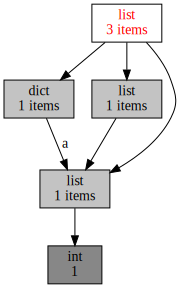

In [283]:
import objgraph
x=[1]
y=[x,[x],{'a':x}]
objgraph.show_refs([y], filename="refs.png")

## 3. 函数function


### 3.1 函数的定义definition和调用call

1. 下面是函数`def f(x, y, z):`的定义，哪个是合法的调用方式？
 - [x] `f(x=1, y=2, z=3)`
 - [x] `f(1, 2, 3)`
 - [x] `f(1, y=2, z=3)`
 - [x] `f(1, 2, z=3)`
 
2. 针对函数`def f(*, x, y, z):`的定义，哪个是合法的调用方式？
 - [x] `f(x=1, y=2, z=3)`
 - [ ] `f(1, 2, 3)`
 - [ ] `f(1, y=2, z=3)`
 - [ ] `f(1, 2, z=3)`
 
3. 针对函数`def f(x, *, y, z):`的定义，哪个是合法的调用方式？
 - [x] `f(x=1, y=2, z=3)`
 - [ ] `f(1, 2, 3)`
 - [x] `f(1, y=2, z=3)`
 - [ ] `f(1, 2, z=3)`
 
4. 针对函数`def f(x, y, *，z):`的定义，哪个是合法的调用方式？
 - [x] `f(x=1, y=2, z=3)`
 - [ ] `f(1, 2, 3)`
 - [x] `f(1, y=2, z=3)`
 - [x] `f(1, 2, z=3)`

In [78]:
def f(*, x, y, z):
    return x + y + z

In [80]:
f(x=1,y=2,z=3)

6

In [81]:
f(1, 2, 3)

TypeError: f() takes 0 positional arguments but 3 were given

In [82]:
f(1, y=2, z=3)

TypeError: f() takes 0 positional arguments but 1 positional argument (and 2 keyword-only arguments) were given

In [83]:
f(1, 2, z=3)

TypeError: f() takes 0 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [84]:
f(z=1, y=2, x=3)

6

In [85]:
def f(*args):
    return sum(args)

In [87]:
f(1,2,3,4)

10

针对函数`def f(x=1,*args, **kargs):`的定义，哪个是合法的调用方式？
 - [x] `f(x=1, y=2, z=3)`
 - [x] `f(1, 2, 3)`
 - [x] `f(1, y=2, z=3)`
 - [x] `f(1, 2, z=3)`

In [115]:
def f(x=1, *args, **kargs):
    print("x = ", x)
    return x + sum(args) + sum(kargs.values())

In [116]:
f(x=1, y=2, z=3)

x =  1


6

In [117]:
f(1, 2, 3)

x =  1


6

In [118]:
f(1, y=3, z=4)

x =  1


8

In [120]:
f(1, 2, 3, z=5)

x =  1


11

### 3.2 迭代器（iterator）与生成器（generator）

#### 迭代器
> 任何具有`next()`方法和`iter()`方法的对象称为迭代器（iterator）。
> `next()`方法要么返回下一个对象，要么返回StopError。
> `iter()`方法返回`self`对象。

- 迭代器定义：`<iter> = iter(<collection>)`  # `iter(<iter>)`   # returns unmodified iterator.
- 通过函数定义：`<iter> = iter(<function>, to_exclusive)`      # A sequence of return values until 'to_exclusive'.
- 逐个访问：`<el>   = next(<iter> [, default])`            # Raises StopIteration or returns 'default' on end.
- 转换为列表：`<list> = list(<iter>)`                   # Returns a list of iterator's remaining elements.

In [75]:
li = [1,2,3,4,5]
liter = iter(li)
for i in range(6):
    print(next(liter))

1
2
3
4
5


StopIteration: 

这是一个生成迭代器类的例子：

In [226]:
class Counter:
    def __init__(self):
        self.i = 0
    def __next__(self):
        self.i += 1
        return self.i
    def __iter__(self):
        return self
    
counter = Counter()
next(counter), next(counter), next(counter)

(1, 2, 3)

In [229]:
isinstance(counter, Counter)

True

#### 可迭代的对象
可迭代的对象包括：
- 通过`iter()`函数返回的迭代器对象，比如`list_iterator`或者`set_iterator`
- 通过`itertools`模块返回的对象，例如count/repeat/cycle等。
- 通过生成器函数或生成器表达式返回的生成器。
- 通过`open()`函数放回的`File`对象。

#### 生成器
- 所有包含`yield`语句的函数返回一个生成器
- 生成器和迭代器两者是可以互换的

In [82]:
def fib(limit):
    n, a, b = 1, 0, 1
    while n <= limit:
        yield b
        a, b = b, a+b
        n += 1

In [84]:
for el in fib(10):
    print(el)

1
1
2
3
5
8
13
21
34
55


## 4. 流程控制Flow control
- 流程控制与其他语言区别不大，唯一的就是Python通过缩进（indent）来表示程序块（block）
- if的语法是`if...elif...else`
- for的语法是`for ... in ...`
- while的语法是`while <condition>:`
- break/continue

In [66]:
x = 5
if x>5:
    print("greater")
elif x<5:
    print("less")
else:
    print("equal")

equal


In [67]:
while x < 10:
    x += 1

In [73]:
for i in range(5):
    if i==3: continue
    print(3**i)

1
3
9
81


### 4.1 例外Exceptions

#### 例外的简单范例

In [ ]:
try:
    <code>
except <exception>:
    <code>

#### 例外的复杂范例

In [ ]:
try:
    <code_1>
except <exception_a>:
    <code_2_a>
except <exception_b>:
    <code_2_b>
else:
    <code_2_c>
finally:
    <code_3>

#### 例外捕获Catching Exceptions

In [ ]:
except <exception>:
except <exception> as <name>:
except (<exception>, ...):
except (<exception>, ...) as <name>:

## 5. 面向对象编程Object-oriented programming
- 在Python中，一切都是对象
- 定义类的时候的关键词是class，object为所有类的**基类（Base class）**
- `__init__(self, *args)`是类的**初始化函数（Initializer）**；
- `__new__(cls, *args)`才是类的**构造函数（constructor）**
- 所有以`__`开头的变量和方法都是类的**私有变量和私有方法（private）**，只能在类内部访问
- 方法定义的时候用**装饰器（Decorator）**可以声明**类方法（`@classmethod`）和静态方法（`@staticmethod`）**
- 普通的方法是**成员方法**或**成员方法**。
- 包裹在`__`和`__`之间的方法为**魔术方法**，一般都有特殊的含义：
  * `__repr__()`和`__str__()`两种方法有什么差异？
- 要获得实例`a`的所有属性，用`a.__dict__`
- 要获得实例`a`的所有属性和方法，用`dir(a)`

In [125]:
class MyClass(object):
    
    def __init__(self, val):
        self.__val = val
        
    def __display(self, s):
        print("{0}:{1}".format(s, self.__val))
        
    def display(self, s):
        self.__display(s)

In [126]:
inst = MyClass(5)
inst.display("Yesterday")

Yesterday:5


In [127]:
print(inst.__val)

AttributeError: 'MyClass' object has no attribute '__val'

In [129]:
inst.__display("Yesterday")

AttributeError: 'MyClass' object has no attribute '__display'

Python并没有真正实现类的私有变量，实际上，我们可以通过`_ClassName__varname`或者`_ClassName__methodname()`访问所谓的私有变量或方法：

In [124]:
print(inst._MyClass__val)

5


In [128]:
inst._MyClass__display("Yesterday")

Yesterday:5


#### 类方法和静态方法的定义

In [254]:
class ExampleClass:
    def __init__(self, a):
        self.a = a
    def __repr__(self):
        class_name = self.__class__.__name__
        #return f'{class_name}({self.a!r})'
        return f'{class_name}({self.a})'
    def __str__(self):
        return str(self.a)

    @classmethod
    def get_class_name(cls):
        return cls.__name__

#### 说明
- 这里两种方法`__repr__`和`__str__`分别有其使用场合。一般来说，`print(<instance>)`调用的是`__str__()`方法，而`<instance>`调用的是`__repr__()`方法。
- 在上面的例子中，在定义`__repr__()`方法时，采取了一种新的格式化输出字符串的方式：`f"{class_name}({self.a!r})"`，每个`{}`中的放置的是变量，如果强制要求用`__repr__()`的方式显示该变量，则后面加入`!r`，否则默认用`__str__`的方式显示。
- `__repr__()`方法的返回结果必须是明确的（unambiguous）；而`__str__()`方法的返回结果必须是可读的；
- 如果只定义了`__repr__()`方法，则`str()`也会返回相同的结果。

In [258]:
example = ExampleClass("James")

In [259]:
print(example)    # call __str__() method

James


In [260]:
example          # call __repr__() method

ExampleClass(James)

#### 类的继承
- 调用基类的`super().__init__()`方法进行初始化
- 扩展其他的实例变量和方法

In [ ]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age  = age

class Employee(Person):
    def __init__(self, name, age, staff_num):
        super().__init__(name, age)
        self.staff_num = staff_num

#### 通过装饰器实现属性的设置和获取

In [224]:
class MyClass:
    @property
    def a(self):
        return self._a

    @a.setter
    def a(self, value):
        self._a = value

In [225]:
el = MyClass()
el.a = 123
print(el.a)

123


### 5.1 抽象基类（Abstract Base Classes, ABC）

In [264]:
from collections.abc import Hashable, Iterable, Reversible

In [265]:
isinstance([1,2,3,4,5], Reversible)

True

In [266]:
isinstance(2.5, Hashable)

True

In [267]:
isinstance((1,2,3,4), Iterable)

True

In [271]:
isinstance(dict().keys(), Hashable)

False

### <font color="red">练习</font>
#### 深层拷贝与浅层拷贝（`copy.copy` and `copy.deepcopy`）
1. 你能否说出深层拷贝和浅层拷贝的区别？
  * [x] 深层拷贝和浅层拷贝都是针对复合数据类型如list或者类实例的
  * [x] 深层拷贝和浅层拷贝都建立对象的拷贝
  * [ ] 深层拷贝与原数据对象共享内部数据
  * [x] 浅层拷贝与原数据对象共享内部数据
  
2. 对于下面的类的实例，对其进行深层拷贝后，产生的数据对象与原对象有什么关系？
  * [x] 

In [280]:
from copy import copy, deepcopy

In [278]:
print(copy.__doc__)

Generic (shallow and deep) copying operations.

Interface summary:

        import copy

        x = copy.copy(y)        # make a shallow copy of y
        x = copy.deepcopy(y)    # make a deep copy of y

For module specific errors, copy.Error is raised.

The difference between shallow and deep copying is only relevant for
compound objects (objects that contain other objects, like lists or
class instances).

- A shallow copy constructs a new compound object and then (to the
  extent possible) inserts *the same objects* into it that the
  original contains.

- A deep copy constructs a new compound object and then, recursively,
  inserts *copies* into it of the objects found in the original.

Two problems often exist with deep copy operations that don't exist
with shallow copy operations:

 a) recursive objects (compound objects that, directly or indirectly,
    contain a reference to themselves) may cause a recursive loop

 b) because deep copy copies *everything* it may copy too much, 

In [325]:
origin = [1,2,[3,4]]
cop1 = origin
cop2 = copy.copy(origin)
cop3 = copy.deepcopy(origin)
print("Original value: ")
print(origin, cop1, cop2, cop3)

Original value: 
[1, 2, [3, 4]] [1, 2, [3, 4]] [1, 2, [3, 4]] [1, 2, [3, 4]]


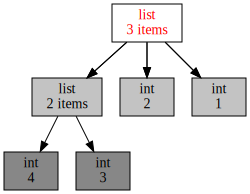

In [327]:
objgraph.show_refs([origin, cop1], filename="same1.png")

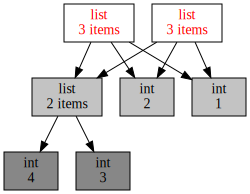

In [328]:
objgraph.show_refs([origin, cop2], filename="shallow1.png")

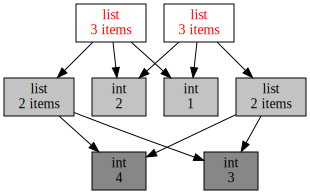

In [329]:
objgraph.show_refs([origin, cop3], filename="deep1.png")

In [330]:
origin[1] = 8
origin[2][1] = 5
print("After changed: ")
print(origin, cop1, cop2, cop3)

After changed: 
[1, 8, [3, 5]] [1, 8, [3, 5]] [1, 2, [3, 5]] [1, 2, [3, 4]]


The same object


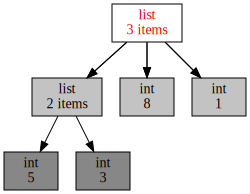

In [332]:
print("The same object")
objgraph.show_refs([origin, cop1], filename="same2.png")

========Shallow Copy=========


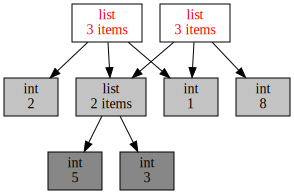

In [333]:
print("========Shallow Copy=========")
objgraph.show_refs([origin, cop2], filename="shallow2.png")

=========Deep Copy============


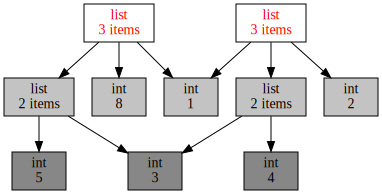

In [334]:
print("=========Deep Copy============")
objgraph.show_refs([origin, cop3], filename="deep2.png")

## 6. 常用的包或模块

这里我们简单介绍几个常用的包和模块：
- `os`
- `sys`
- `re`
- `math`

### 6.1 `sys`模块

- `sys`模块指的不是操作系统，是Python解释器。
- `sys.argv`是命令行参数。
- `sys.path`是所有能被`import`直接导入的模块路径的列表。
- `sys.getrefcount()`可以返回某个内存地址引用的次数。
- `sys.getsizeof()`返回的是一个变量内存占用的字节。
- `sys.exit()`函数与C函数的return和exit有相同的功能

In [137]:
import sys

In [138]:
print(sys.path)

['/home/bio/bi296/chap8/code/basic', '/opt/miniconda3/lib/python37.zip', '/opt/miniconda3/lib/python3.7', '/opt/miniconda3/lib/python3.7/lib-dynload', '', '/opt/miniconda3/lib/python3.7/site-packages', '/opt/miniconda3/lib/python3.7/site-packages/IPython/extensions', '/home/bio/.ipython']


In [179]:
x=1
print(sys.getrefcount(x))

2463


In [180]:
print(sys.getsizeof(x))

28


- 默认的文件系统编码

In [168]:
sys.getfilesystemencoding()

'utf-8'

- 不同的数据类型的信息

In [173]:
sys.int_info

sys.int_info(bits_per_digit=30, sizeof_digit=4)

In [174]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [178]:
sys.getsizeof(125.3348)

24

### 6.2 `os`模块
- `os`模块对应的是操作系统相关的。
  * `os.listdir()`对应的是`ls`命令
  * `os.chdir()`对应的是`cd`命令
  * `os.chmod()`对应`chmod`命令
  * `os.chown()`对应`chown`命令
  * `os.mkdir()`对应`mkdir`命令
  * `os.makedirs()`对应哪个命令？
  * 
  * `os.curdir`输出的是"."当前路径
  * `os.environ`返回的是`env`命令相同的输出
- `os.path`对应的是目录、路径的操作。

In [181]:
import os

In [292]:
type(os)

module

In [293]:
os.listdir()

['chap8.ipynb', '.ipynb_checkpoints']

In [295]:
os.listdir(path="/")

['lib',
 'sys',
 'opt',
 'sbin',
 'etc',
 'srv',
 'var',
 'mnt',
 'lib64',
 'bin',
 '.autorelabel',
 'boot',
 'home',
 'tmp',
 'media',
 'root',
 'usr',
 '.dockerenv',
 'dev',
 'run',
 'proc',
 'anaconda-post.log',
 'lost+found']

In [182]:
from os import path

In [184]:
path.join(path.abspath("."), "basic.ipynb")

'/home/bio/bi296/chap8/code/basic/basic.ipynb'

In [188]:
print(path.sep, path.altsep)

/ None


In [193]:
path.dirname(path.abspath("."))

'/home/bio/bi296/chap8/code'

In [200]:
for dir, dirnames, files in os.walk("."):
    print(dir, dirnames, files)

. ['.ipynb_checkpoints'] ['chap8.ipynb']
./.ipynb_checkpoints [] ['chap8-checkpoint.ipynb']


In [216]:
os.readlink?

### 6.3 `re`模块
- `re`模块是用于正则表达式匹配和替换工作的
- 

In [317]:
import copy, objgraph
x = [1.3,2.4,3.1]
y = copy.copy(x)
print(id(x), id(y), id(x[0]), id(y[0]))
y[0] = 3.4
z = copy.deepcopy(x)
print(id(x), id(z), id(x[0]), id(z[0]))
z[0] = 2.2

140155384721152 140155384720992 140155382421968 140155382421968
140155384721152 140155454248432 140155382421968 140155382421968


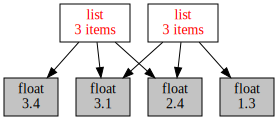

In [315]:
objgraph.show_refs([x, y], filename="shallow_copy.png")

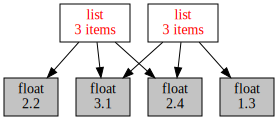

In [318]:
objgraph.show_refs([x, z], filename="deep_copy.png")